In [60]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [61]:
ss_results = np.genfromtxt('ss_results.csv', delimiter=',', skip_header=1, 
                           names=['pixel', 'ra(radians)', 'dec(radians)', 'mlog10p', 'nsigma','gamma'])

The ss_results file contains the pixel, postion (RA, DEC in radians) and -log_10(p-value), N$\sigma$ and specral index gamma for the all sky hotspot analysis.  The N$\sigma$ portion is used for Figure 4 and the inset of Figure 1.
The $\gamma$ is presented in supplamental figure.

Below these are shown to make similar plots as these, here shown with a Mollweide Projection using healpy



In [62]:
ss_nsigmas = ss_results['nsigma']
ss_gamma = ss_results['gamma']
ss_mlog10p = ss_results['mlog10p']

In [63]:
cmap = plt.cm.RdBu_r  # define the colormap
N_colors = cmap.N // 2
#print('N_colors', N_colors)
cmaplist = [cmap(i) for i in range(N_colors, cmap.N)]
cmaplist[0] = (1., 1., 1., 1.) # force first bin to be completely white

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 4, 9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

0.0 180.0 -180.0 180.0


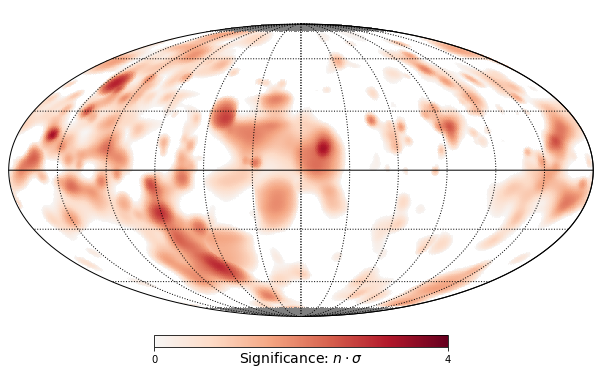

In [64]:
hp.mollview(ss_nsigmas, rot=(180,0), cmap = cmap, min=0,
            title=' ', max=4, unit=r'Significance: $n\cdot \sigma$')
hp.graticule()

In [79]:
ss_gamma_plot = np.copy(ss_gamma)

In [80]:
ss_gamma_plot[ss_mlog10p < 0.5] = np.nan

0.0 180.0 -180.0 180.0


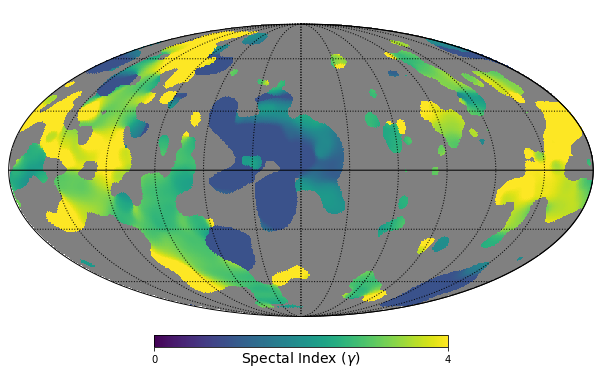

In [81]:

hp.mollview(ss_gamma_plot, rot=(180,0), cmap = 'viridis', min=0,
            title=' ', max=4, unit=r'Spectal Index ($\gamma$)')
hp.graticule()